# Многомерная нелинейная оптимизация

$$f(x) = x_1^3 - x_1 x_2 + x_2^2 - 2x_1 + 3x_2 - 4 \rightarrow extr, \; x^0 = (1;0)$$

По формуле Тейлора с остаточным членом в форме Пеано:

$$f(x) = f(x^0) + \nabla f(x^0) (x - x^0) + \dfrac{1}{2}(x-x^0)^T H_f(x^0)(x-x^0) + o(||x-x^0||^2)$$

$f(x_0) = 1^3 - 0 + 0 - 2 + 0 - 4 = -5$ 

$\nabla f(x) = (3x_1^2 - x_2 - 2,\; -x_1 + 2x_2+ 3) \rightarrow \nabla f(x^0) = (1,\; 2)$

$ H_f(x) = \begin{pmatrix}
    6x_1 & -1 \\
    -1 & 2
\end{pmatrix} \rightarrow H_f(x^0) = 
\begin{pmatrix}
    6 & -1 \\
    -1 & 2
\end{pmatrix}  $

### 3. Явный вид $g(x)$

$g(x) = f(x^0) + \nabla f(x^0) (x - x^0) + \dfrac{1}{2}(x-x^0)^T H_f(x^0)(x-x^0)$

$g(x) = -5 + (1,\; 2) \begin{pmatrix} x_1 - 1 \\ x_2 \end{pmatrix} + \dfrac{1}{2} (x_1 - 1, \; x_2) 
\begin{pmatrix} 6 & -1 \\ -1 & 2 \end{pmatrix} \begin{pmatrix} x_1 - 1 \\ x_2 \end{pmatrix}$

$g(x) = 3 x_1^2 + x_2^2 - x_1 x_2 - 5 x_1 + 3x_2 - 3$

### Функции

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def f(x1, x2):
    return x1**3 - x1*x2 + x2**2 - 2*x1 + 3*x2 - 4

def g(x1, x2):
    return 3*x1**2 + x2**2 - x1*x2 - 5*x1 + 3*x2 - 3

### 4. Графики $f(x)$ и $g(x)$

Text(0, 0.5, 'x2')

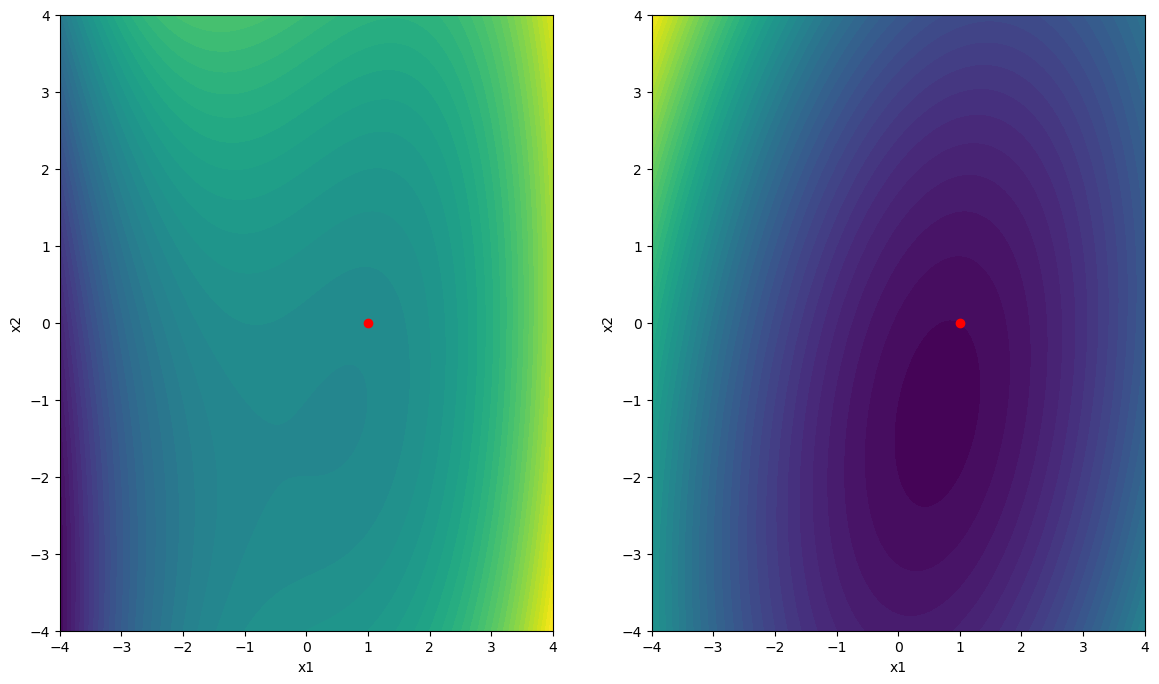

In [30]:
# Посмотрим на функцию

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

xgrid, ygrid = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))


ax1.contourf(xgrid, ygrid, f(xgrid, ygrid), levels=50)
ax1.scatter(1, 0, c="r")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")



ax2.contourf(xgrid, ygrid, g(xgrid, ygrid), levels=50)
ax2.scatter(1, 0, c="r")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

Text(0.5, 0.5, 'x2')

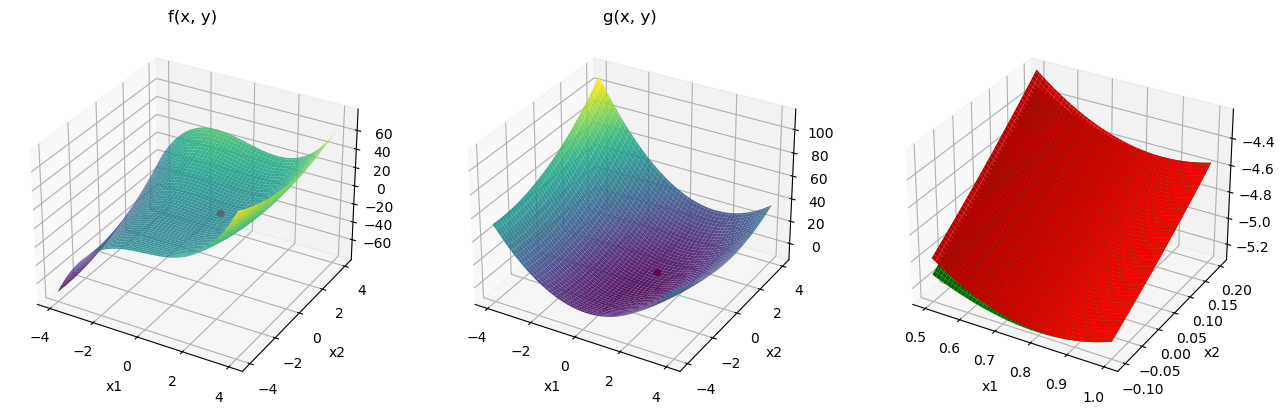

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8), subplot_kw={'projection': '3d'})

xgrid, ygrid = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))


ax1.plot_surface(xgrid, ygrid, f(xgrid, ygrid), cmap="viridis", alpha=0.9)
ax1.scatter(1, 0, c="r")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("f(x, y)")


ax2.plot_surface(xgrid, ygrid, g(xgrid, ygrid), cmap="viridis", alpha=0.9)
ax2.scatter(1, 0, c="r")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("g(x, y)")

xgrid1, ygrid1 = np.meshgrid(np.linspace(0.5, 1, 100), np.linspace(-0.1, 0.2, 100))


ax3.plot_surface(xgrid1, ygrid1, f(xgrid1, ygrid1), color='g', alpha=1, label='f')
ax3.plot_surface(xgrid1, ygrid1, g(xgrid1, ygrid1), color='r', alpha=1, label='g')
# ax3.set_xlim(-0.1, 0.1)
# ax3.set_ylim(-0.1, 0.1)
# ax3.scatter(0, 1, c="r")
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")
# ax3.set_legend()




Зелёный -- $f$, а красный -- $g$

### 5. Выпуклость $g$

Для этого нужно рассмотреть матрицу и понять: как она определена

$$H_f(x^0) = 
\begin{pmatrix}
    6 & -1 \\
    -1 & 2
\end{pmatrix}$$

Рассмотрим критерий Сильвестра:

$\Delta_1 = 6 > 0$, $\Delta_2 = 12 - 1 = 11 > 0$, получается, что $H_f(x^0) > 0$, тогда $g$ строго выпуклая функция

## 6. Поиск стационарной точки

### 6.a. Метод дробления шага (при градиентном спуске)

In [32]:
def printTable(data):
    for i in range(len(data)):
        print(f'Итерация: {i + 1} | Точка: {data[i]}')

In [33]:
def fVec(x):
    return x[0]**3 - x[0]*x[1] + x[1]**2 - 2*x[0] + 3*x[1] - 4

In [34]:
#зададим градиент f
# \nabla f(x) = (3x_1^2 - x_2 - 2,\; -x_1 + 2x_2+ 3)
def gradf(x):
    return np.array([3*x[0]**2 - x[1] - 2, -x[0] + 2*x[1] + 3])

In [35]:
def gradDescent(func, gradFunc, x0, alpha = 1, eps = 1e-4):
    xk = x0
    gradF = gradFunc(xk)
    xkForIter = [xk]
    fkForIter = [func(xk)]
    while np.linalg.norm(gradF) > eps:
        if func(xk - alpha * gradF / np.linalg.norm(gradF)) < func(xk):
            xk = xk - alpha * gradF / np.linalg.norm(gradF)
        else:
            alpha /= 2
        gradF = gradFunc(xk)
        xkForIter.append(xk)
        fkForIter.append(func(xk))
    return xk, func(xk), xkForIter, fkForIter

In [36]:
x0 = np.array([1, 0])
xk, fk, xData, fData = gradDescent(fVec, gradf, x0)
printTable(xData)

Итерация: 1 | Точка: [1 0]
Итерация: 2 | Точка: [ 0.5527864  -0.89442719]
Итерация: 3 | Точка: [ 0.5527864  -0.89442719]
Итерация: 4 | Точка: [ 0.69065427 -1.37504393]
Итерация: 5 | Точка: [ 0.69065427 -1.37504393]
Итерация: 6 | Точка: [ 0.47130363 -1.25510521]
Итерация: 7 | Точка: [ 0.47130363 -1.25510521]
Итерация: 8 | Точка: [ 0.47130363 -1.25510521]
Итерация: 9 | Точка: [ 0.47130363 -1.25510521]
Итерация: 10 | Точка: [ 0.50172186 -1.26226717]
Итерация: 11 | Точка: [ 0.50172186 -1.26226717]
Итерация: 12 | Точка: [ 0.49307613 -1.2492521 ]
Итерация: 13 | Точка: [ 0.49307613 -1.2492521 ]
Итерация: 14 | Точка: [ 0.50034506 -1.25211526]
Итерация: 15 | Точка: [ 0.50034506 -1.25211526]
Итерация: 16 | Точка: [ 0.50034506 -1.25211526]
Итерация: 17 | Точка: [ 0.49923735 -1.25050664]
Итерация: 18 | Точка: [ 0.49923735 -1.25050664]
Итерация: 19 | Точка: [ 0.50020437 -1.25037045]
Итерация: 20 | Точка: [ 0.50020437 -1.25037045]
Итерация: 21 | Точка: [ 0.49985229 -1.25003212]
Итерация: 22 | Точка:

Text(0, 0.5, 'Целевая функция')

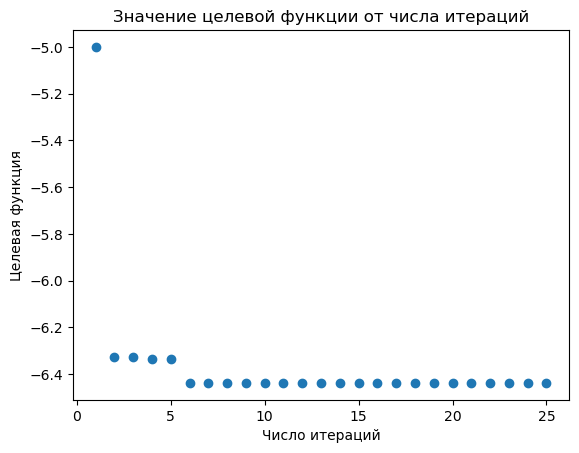

In [37]:
plt.scatter(np.arange(1, len(fData) + 1), fData)
plt.title('Значение целевой функции от числа итераций')
plt.xlabel('Число итераций')
plt.ylabel('Целевая функция')

### 6.b. Метод наискорейшего спуска

In [38]:
from scipy.optimize import minimize_scalar

In [39]:
def steepDescent(func, gradFunc, x0, eps = 1e-4):
    xk = x0
    gradF = gradFunc(xk)
    xkForIter = [xk]
    fkForIter = [func(xk)]
    while np.linalg.norm(gradF) > eps:
        #find alpha:
        findAlpha = lambda alpha: func(xk - alpha * gradF / np.linalg.norm(gradF))
        optAlpha = minimize_scalar(findAlpha).x
        xk = xk - optAlpha * gradF / np.linalg.norm(gradF)
        gradF = gradFunc(xk)
        xkForIter.append(xk)
        fkForIter.append(func(xk))
    return xk, func(xk), xkForIter, fkForIter

In [40]:
xk, fk, xDataSteep, fDataSteep = steepDescent(fVec, gradf, x0)
printTable(xDataSteep)

Итерация: 1 | Точка: [1 0]
Итерация: 2 | Точка: [ 0.38742588 -1.22514824]
Итерация: 3 | Точка: [ 0.48589615 -1.27438337]
Итерация: 4 | Точка: [ 0.49835983 -1.24945597]
Итерация: 5 | Точка: [ 0.4998773 -1.2502147]
Итерация: 6 | Точка: [ 0.49998684 -1.24999561]


Text(0, 0.5, 'Целевая функция')

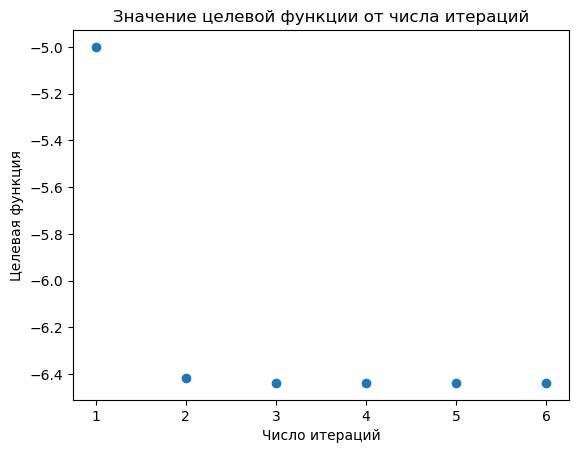

In [41]:
plt.scatter(np.arange(1, len(fDataSteep) + 1), fDataSteep)
plt.title('Значение целевой функции от числа итераций')
plt.xlabel('Число итераций')
plt.ylabel('Целевая функция')

In [42]:
xData = np.array(xData)
xDataSteep = np.array(xDataSteep)

C:\Users\roman\AppData\Local\Temp\ipykernel_20740\1815803716.py:12: RuntimeWarning: invalid value encountered in double_scalars
  cos = (xData[i+1,0] - xData[i,0]) / length
C:\Users\roman\AppData\Local\Temp\ipykernel_20740\1815803716.py:13: RuntimeWarning: invalid value encountered in double_scalars
  sin = (xData[i+1,1] - xData[i,1]) / length


Text(0, 0.5, 'x2')

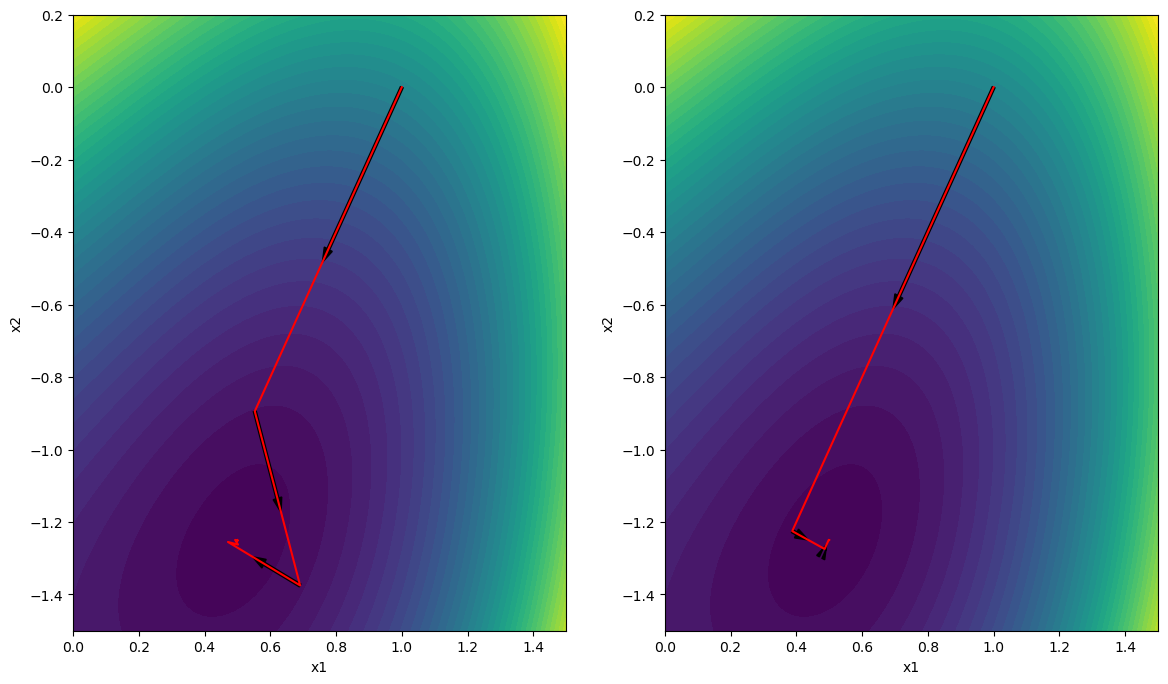

In [43]:
# Посмотрим на функцию

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

xgrid, ygrid = np.meshgrid(np.linspace(0, 1.5, 100), np.linspace(-1.5, 0.2, 100))


ax1.contourf(xgrid, ygrid, f(xgrid, ygrid), levels=50)
ax1.plot(xData[:, 0], xData[:,1], c="r")
for i in range(6):
    length = np.sqrt((xData[i,0] - xData[i+1,0])**2 + (xData[i,1] - xData[i+1,1])**2)
    cos = (xData[i+1,0] - xData[i,0]) / length
    sin = (xData[i+1,1] - xData[i,1]) / length
    ax1.arrow(xData[i,0], xData[i,1], length * 0.5 * cos, length * 0.5 * sin, color = 'black', width=0.009)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")



ax2.contourf(xgrid, ygrid, f(xgrid, ygrid), levels=50)
ax2.plot(xDataSteep[:, 0], xDataSteep[:,1], c="r")
for i in range(3):
    length = np.sqrt((xDataSteep[i,0] - xDataSteep[i+1,0])**2 + (xDataSteep[i,1] - xDataSteep[i+1,1])**2)
    cos = (xDataSteep[i+1,0] - xDataSteep[i,0]) / length
    sin = (xDataSteep[i+1,1] - xDataSteep[i,1]) / length
    ax2.arrow(xDataSteep[i,0], xDataSteep[i,1], length * 0.5 * cos, length * 0.5 * sin, color = 'black', width=0.009, length_includes_head = True)
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

### 6.c. Стационарная точка для $g(x)$

In [44]:
def gVec(x):
    return 3*x[0]**2 + x[1]**2 - x[0]*x[1] - 5*x[0] + 3*x[1] - 3

#$g(x) = 3 x_1^2 + x_2^2 - x_1 x_2 - 5 x_1 + 3x_2 - 3$
def gradg(x):
    return np.array([6*x[0] - x[1] - 5, 2*x[1] - x[0] + 3])

In [45]:
xk, fk, xDataG, fDataG = steepDescent(gVec, gradg, x0)
printTable(xDataG)

Итерация: 1 | Точка: [1 0]
Итерация: 2 | Точка: [ 0.49999999 -1.00000002]
Итерация: 3 | Точка: [ 0.66666666 -1.08333334]
Итерация: 4 | Точка: [ 0.62500001 -1.16666665]
Итерация: 5 | Точка: [ 0.63888889 -1.1736111 ]
Итерация: 6 | Точка: [ 0.63541666 -1.18055555]
Итерация: 7 | Точка: [ 0.63657408 -1.18113426]
Итерация: 8 | Точка: [ 0.63628474 -1.18171293]
Итерация: 9 | Точка: [ 0.63638117 -1.18176116]
Итерация: 10 | Точка: [ 0.63635708 -1.18180944]


Text(0, 0.5, 'Целевая функция')

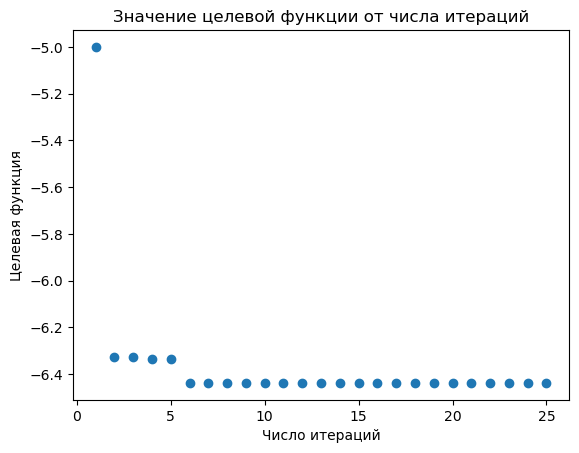

In [46]:
plt.scatter(np.arange(1, len(fData) + 1), fData)
plt.title('Значение целевой функции от числа итераций')
plt.xlabel('Число итераций')
plt.ylabel('Целевая функция')

In [47]:
xDataG = np.array(xDataG)

Text(0, 0.5, 'x2')

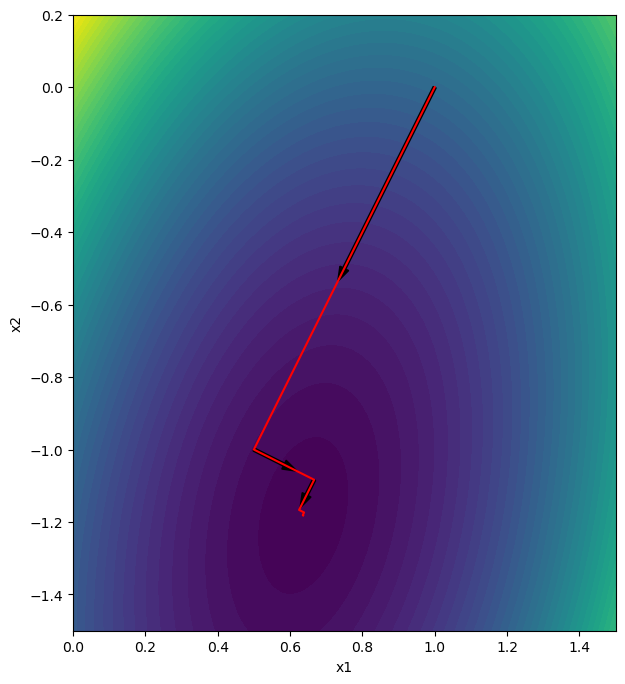

In [48]:
# Посмотрим на функцию

fig, ax1 = plt.subplots(1, 1, figsize=(7, 8))

xgrid, ygrid = np.meshgrid(np.linspace(0, 1.5, 100), np.linspace(-1.5, 0.2, 100))


ax1.contourf(xgrid, ygrid, g(xgrid, ygrid), levels=50)
ax1.plot(xDataG[:, 0], xDataG[:,1], c="r")
for i in range(3):
    length = np.sqrt((xDataG[i,0] - xDataG[i+1,0])**2 + (xDataG[i,1] - xDataG[i+1,1])**2)
    cos = (xDataG[i+1,0] - xDataG[i,0]) / length
    sin = (xDataG[i+1,1] - xDataG[i,1]) / length
    ax1.arrow(xDataG[i,0], xDataG[i,1], length * 0.5 * cos, length * 0.5 * sin, color = 'black', width=0.009)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")

### Определим тип стац. точки для $f(x)$

In [49]:
print(xData[-1])

[ 0.4999921  -1.25000993]


Матрица Гесса для $f(x)$

$$ H_f(x) = \begin{pmatrix}
    6x_1 & -1 \\
    -1 & 2
\end{pmatrix}$$

$\Delta_1 = 6x_1 \approx 3 > 0$, $\Delta_2 = 12x_1 - 1 \approx 5 > 0 $, по критерию Сильвестра найденная точка является точкой строго локального минимума

### Сопоставление времени работы алгоритмов

In [50]:
import time

In [51]:
print('Число итераций для дробления шага:', len(xData))
print('Число итераций для наискорейшего спуска:', len(xDataSteep))

Число итераций для дробления шага: 25
Число итераций для наискорейшего спуска: 6


In [52]:
expNum = 100
expTime = 0
for i in range(expNum):
    start_time = time.time()
    _, _, _, _ = gradDescent(fVec, gradf, x0)
    expTime += time.time() - start_time
expTime /= expNum
print('Время работы для дробления шага: ', expTime, ' секунд')

expTime = 0
for i in range(expNum):
    start_time = time.time()
    _, _, _, _ = steepDescent(fVec, gradf, x0)
    expTime += time.time() - start_time
expTime /= expNum
print('Время работы для наискорейшего спуска: ', expTime, ' секунд')

Время работы для дробления шага:  0.0004706025123596191  секунд
Время работы для наискорейшего спуска:  0.0014749598503112794  секунд


По количеству итераций метод наискорейшего спуска работает быстрее, однако, времени было потрачено больше. Эти два метода отличаются лишь в одном месте: поиске $\alpha$. Для поиска оптимального шага использовался численный метод. Возможно, если бы оптмальный шаг был найден аналитически, то метод работал бы быстрее